# BERTopic exploration and clusterizaztion

### Step 1 Import Librairies

In [1]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
import joblib
import pandas as pd

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from copy import deepcopy

## Minimal Working Example with clean_text column

### Step 2: Load cleaned dataset

In [2]:
# Load your pre-cleaned CSV file (make sure it includes a 'clean_text' column)
df = pd.read_csv("data/cleaned_amazon_reviews_final.csv")

# Drop rows where 'clean_text' is missing (e.g., NaN)
# Reset index to make row indexing clean and sequential
df_clean = df.dropna(subset=['clean_text']).reset_index(drop=True)

# Convert the cleaned text column to a list of documents
docs = df_clean['clean_text'].tolist()

### STEP 3: Initialize BERTopic model

In [3]:
# Create a BERTopic model using English language embeddings and a fixed random_state via UMAP

# Define UMAP with a fixed random_state
umap_model = UMAP(random_state=12)

# Set calculate_probabilities=True to get the full probability matrix
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

### STEP 4: Fit the model to your text

In [4]:
# This will:
# - Generate vector embeddings from your text
# - Reduce dimensions using UMAP
# - Cluster using HDBSCAN
# - Assign a topic ID per document
# - Generate a probability distribution over all topics per document

topics, probs = topic_model.fit_transform(docs)

2025-06-12 11:36:12,306 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/627 [00:00<?, ?it/s]

2025-06-12 11:38:06,080 - BERTopic - Embedding - Completed ✓
2025-06-12 11:38:06,081 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-12 11:38:34,230 - BERTopic - Dimensionality - Completed ✓
2025-06-12 11:38:34,232 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-12 11:39:32,046 - BERTopic - Cluster - Completed ✓
2025-06-12 11:39:32,053 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-12 11:39:32,472 - BERTopic - Representation - Completed ✓


### STEP 5: Save results back to df_clean

In [5]:
# Assign the main topic number per document
df_clean['topic'] = topics

# Compute and assign the confidence score (probability) for the assigned topic only
# Create a list of probabilities corresponding to each document's main topic
topic_probs = np.array([
    probs[i][t] if t != -1 else np.nan  # topic -1 means "outlier", so assign NaN
    for i, t in enumerate(topics)
])

# Save to the dataframe
df_clean['topic_prob'] = topic_probs

### STEP 6: View topic overview

In [6]:
# This shows a DataFrame with:
# - Topic ID
# - Number of documents assigned to each topic
# - Top 4 words per topic
topic_model.get_topic_info()



,Topic,Count,Name,Representation,Representative_Docs
0,-1,7775,-1_batteri_tablet_use_love,"[batteri, tablet, use, love, game, old, kid, b...",[great christma gift bought fire hd replac old...
1,0,1570,0_echo_alexa_sound_speaker,"[echo, alexa, sound, speaker, tap, music, show...",[great bluetooth speaker use amazon alexa seve...
2,1,723,1_reader_read_voyag_book,"[reader, read, voyag, book, page, paperwhit, l...",[best yet previou sever kindl devic owner read...
3,2,424,2_tablet_price_size_nice,"[tablet, price, size, nice, easi, great, perfe...",[great tablet price everyth want tablet size g...
4,3,419,3_kid_tablet_grandson_old,"[kid, tablet, grandson, old, children, child, ...",[great tablet kid great year old love great pr...
...,...,...,...,...,...
213,212,10,212_three_duracel_duracellin_duti,"[three, duracel, duracellin, duti, strength, n...","[three star doesnt last long say duracel, thre..."
214,213,10,213_durabl_kiddo_gameplay_content,"[durabl, kiddo, gameplay, content, tho, upload...","[awesom kid love durabl user friendli, durabl ..."
215,214,10,214_famili_gxbbcfh_huh_ghj,"[famili, gxbbcfh, huh, ghj, grandbabi, member,...",[love kindl bought one famili member love mine...
216,215,10,215_three_theyr_weak_longest,"[three, theyr, weak, longest, truli, gone, sta...","[three star theyr batteri like advertis, three..."


### Step 7: Explore and Visualize

In [7]:
# Visualize inter-topic distances
topic_model.visualize_topics()

# Loop through topic IDs and print top 10 words per topic
for topic_id in range(len(topic_model.get_topics())):
    topic = topic_model.get_topic(topic_id)
    if topic:  # Only process if topic is not False or None
        print(f"\nTopic {topic_id}:")
        print(topic[:10])  # top 10 terms and scores
    else:
        print(f"\nTopic {topic_id}: [No data]")




Topic 0:
[('echo', 0.027192952593250913), ('alexa', 0.024096455739885895), ('sound', 0.018444181644092037), ('speaker', 0.018007153051539115), ('tap', 0.016549607286740636), ('music', 0.016295105808786535), ('show', 0.013984031201853693), ('home', 0.011732831513857966), ('dot', 0.011546231112589189), ('smart', 0.011314369824891278)]

Topic 1:
[('reader', 0.0241825070263876), ('read', 0.020166304926329332), ('voyag', 0.01912244602323792), ('book', 0.017721454259067966), ('page', 0.017509569409386132), ('paperwhit', 0.0171738640825486), ('light', 0.01692891056696246), ('kindl', 0.015317347302742881), ('eread', 0.012126916770014753), ('turn', 0.009790553892544743)]

Topic 2:
[('tablet', 0.027639306536223898), ('price', 0.01157792045012204), ('size', 0.01105688288509302), ('nice', 0.010854924829466562), ('easi', 0.0108025252270934), ('great', 0.009986187299335012), ('perfect', 0.007404639792768119), ('fast', 0.006929292495699954), ('beginn', 0.006605407207321784), ('recommend', 0.00655678

In [8]:
for topic_id, terms in topic_model.get_topics().items():
    print(f"\nTopic {topic_id}:")
    print(terms[:10])



Topic -1:
[('batteri', 0.00464943447621012), ('tablet', 0.004532755618847108), ('use', 0.004357554010139121), ('love', 0.00426738861425971), ('game', 0.004174531786437686), ('old', 0.004166309372384641), ('kid', 0.004161608803080081), ('brand', 0.004140028540666113), ('year', 0.004128631238256058), ('last', 0.004122854931075907)]

Topic 0:
[('echo', 0.027192952593250913), ('alexa', 0.024096455739885895), ('sound', 0.018444181644092037), ('speaker', 0.018007153051539115), ('tap', 0.016549607286740636), ('music', 0.016295105808786535), ('show', 0.013984031201853693), ('home', 0.011732831513857966), ('dot', 0.011546231112589189), ('smart', 0.011314369824891278)]

Topic 1:
[('reader', 0.0241825070263876), ('read', 0.020166304926329332), ('voyag', 0.01912244602323792), ('book', 0.017721454259067966), ('page', 0.017509569409386132), ('paperwhit', 0.0171738640825486), ('light', 0.01692891056696246), ('kindl', 0.015317347302742881), ('eread', 0.012126916770014753), ('turn', 0.0097905538925447

In [9]:
# Visualize inter-topic distance map
display(topic_model.visualize_topics())
fig = topic_model.visualize_topics()
fig.write_html("visualization/bertopic_topics.html")

# Visualize top words as bar chart (for topic 0, or remove topics=[] for dropdown)
display(topic_model.visualize_barchart(top_n_topics=10))
fig = topic_model.visualize_barchart()
fig.write_html("visualization/bertopic_barchart.html")

# Visualize topic hierarchy (semantic tree view)
display(topic_model.visualize_hierarchy())
fig = topic_model.visualize_hierarchy()
fig.write_html("visualization/bertopic_topic_hierarchy.html")

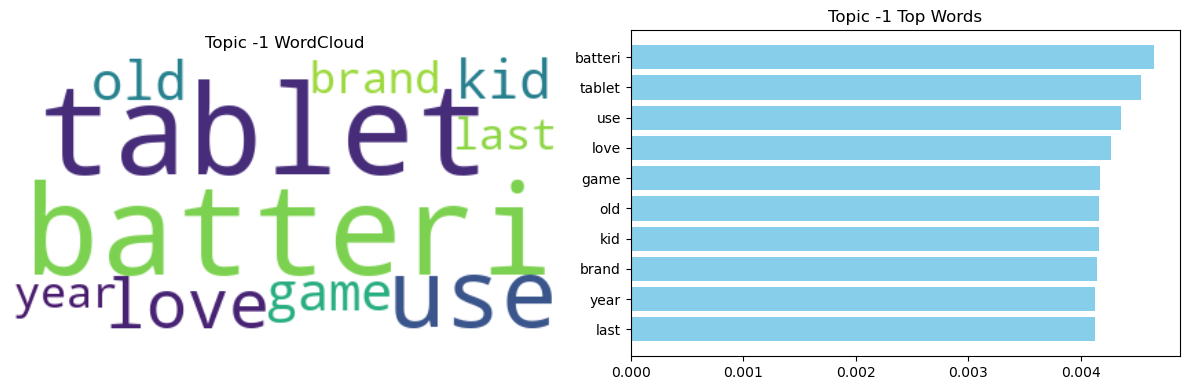

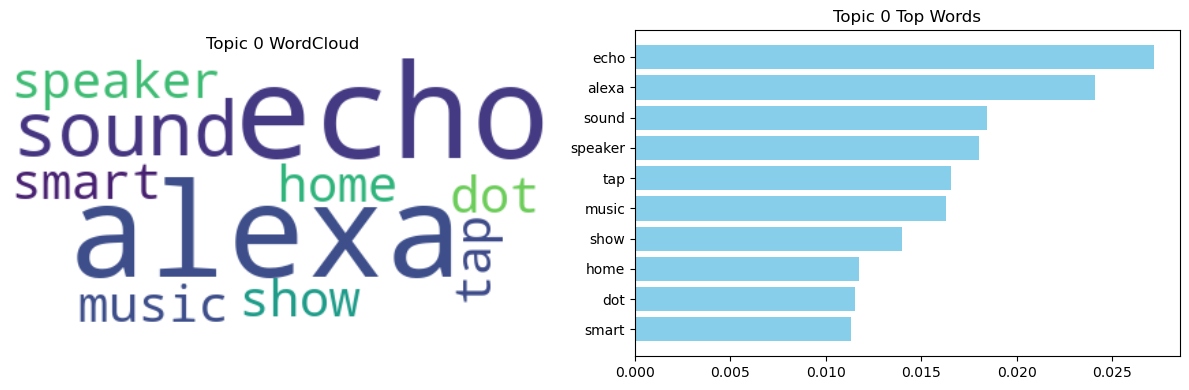

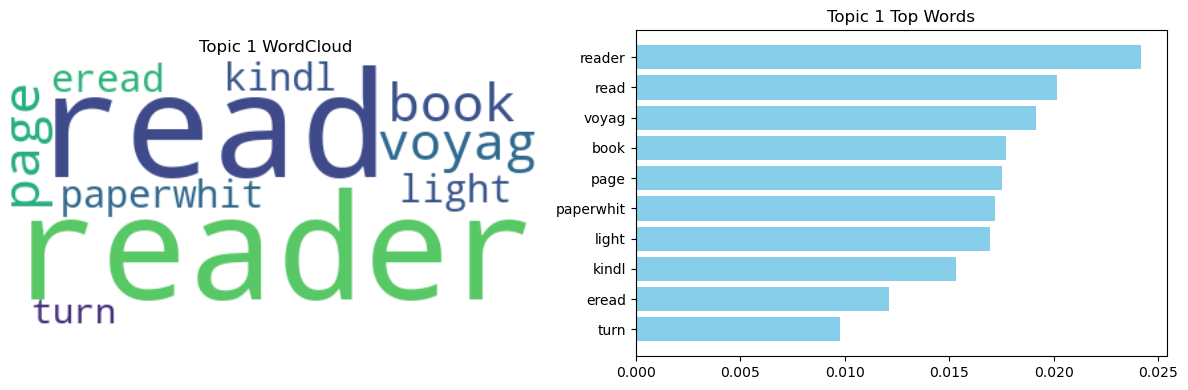

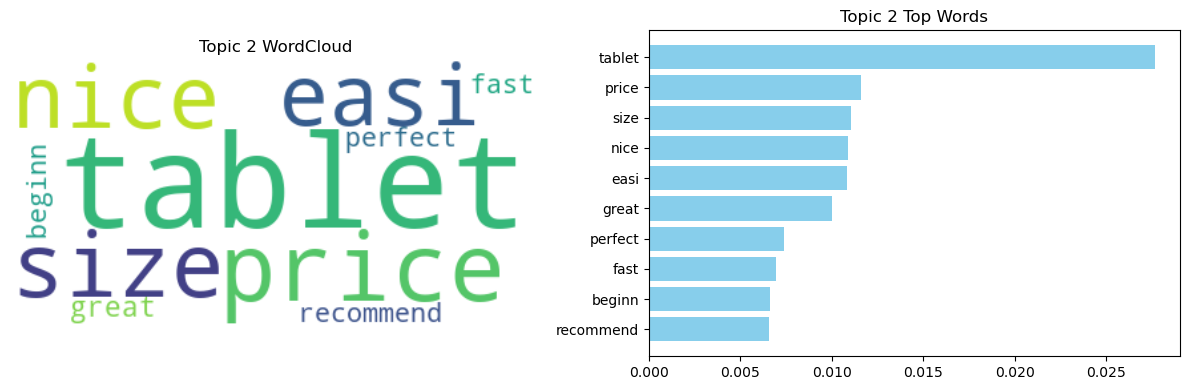

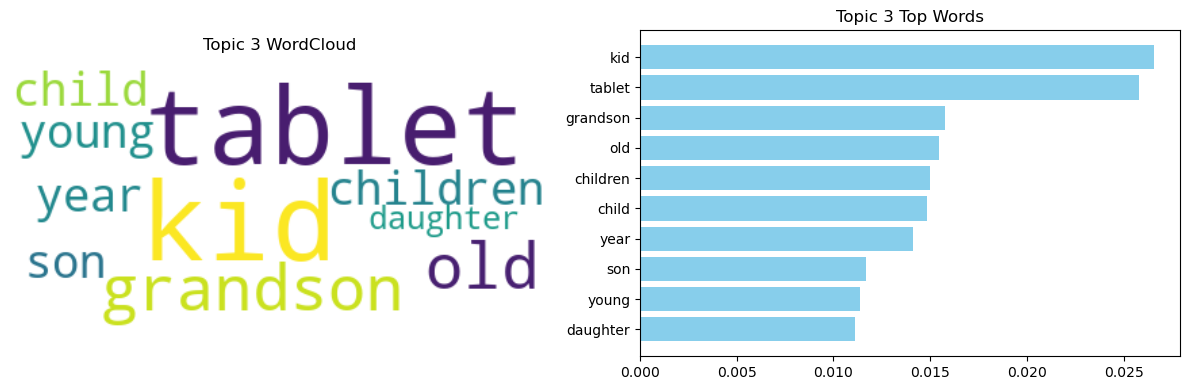

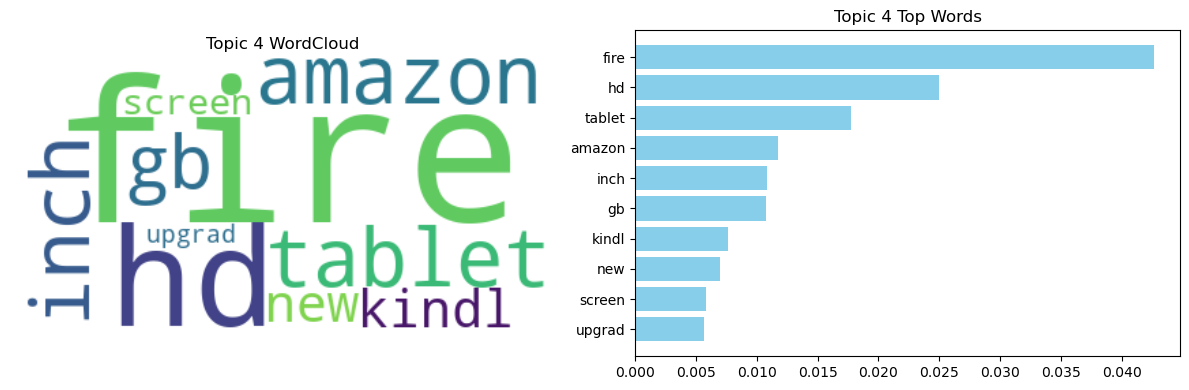

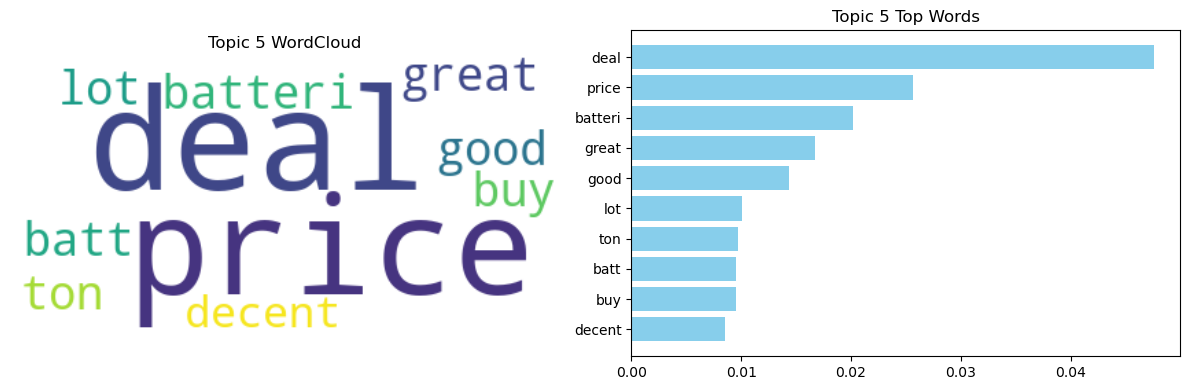

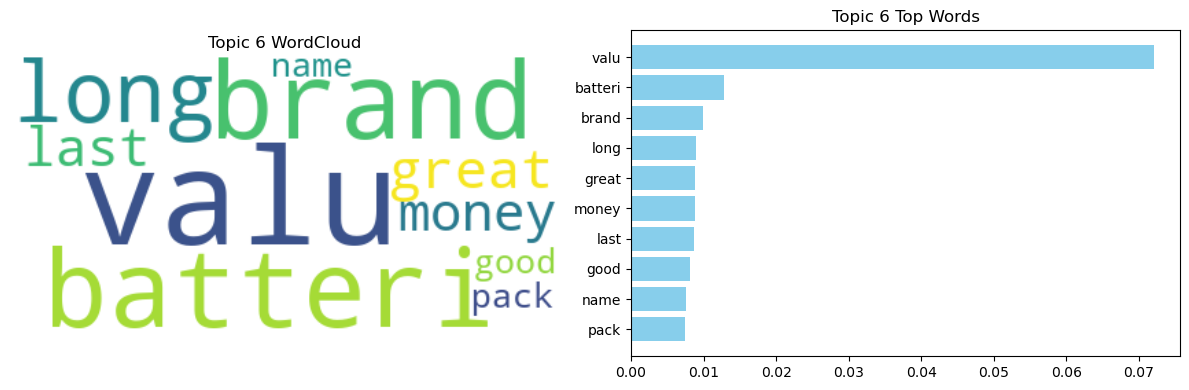

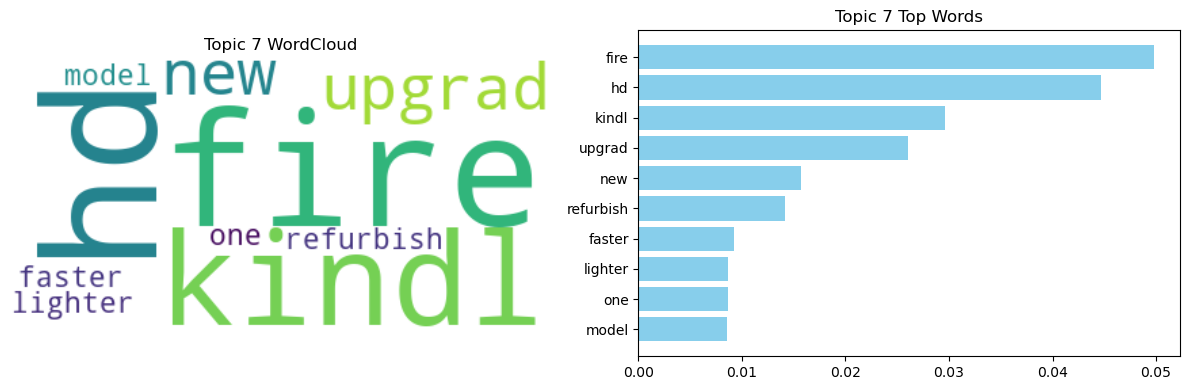

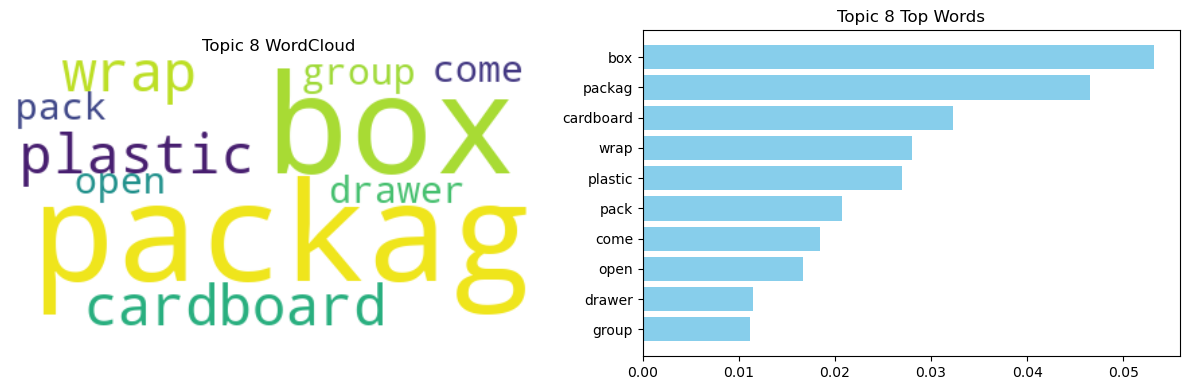

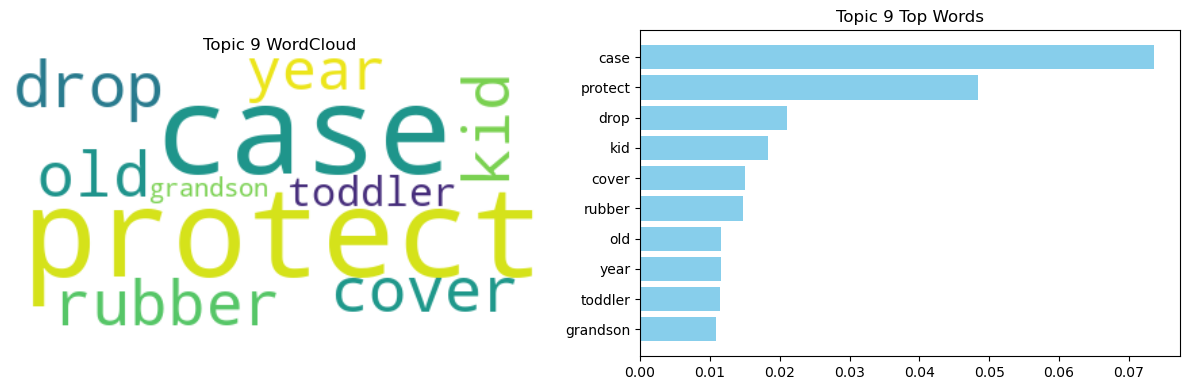

In [10]:
# Loop through the top 5 or more topics
top_topic_ids = topic_model.get_topic_info().head(11)['Topic'].tolist()

for topic_id in top_topic_ids:
    # -- Get top 10 words and scores
    top_words = topic_model.get_topic(topic_id)[:11]
    words = [w for w, _ in top_words]
    scores = [s for _, s in top_words]

    # -- Generate WordCloud text
    text = " ".join(words)
    wordcloud = WordCloud(background_color='white', width=400, height=200).generate(text)

    # -- Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # WordCloud
    axes[0].imshow(wordcloud, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title(f'Topic {topic_id} WordCloud')

    # Bar chart
    axes[1].barh(words[::-1], scores[::-1], color='skyblue')
    axes[1].set_title(f'Topic {topic_id} Top Words')
    # axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()


#### Function to compare_topic_vs_sentiment 

In [11]:
def compare_topic_vs_sentiment(df, topic_col='cluster_id', label_col='label', include_proportions=True):
    """
    Compare how sentiment labels distribute across topic clusters.

    Parameters:
    - df: pandas DataFrame containing topic and sentiment columns
    - topic_col: str, name of the column with topic/cluster assignments
    - label_col: str, name of the sentiment label column (e.g., 0=neg, 2=pos)
    - include_proportions: bool, whether to show normalized proportions

    Returns:
    - A tuple of two DataFrames:
      (count_table, proportion_table)
    """

    # Raw count of sentiment labels per topic
    count_table = pd.crosstab(df[topic_col], df[label_col])

    # Optional: proportions per topic row
    if include_proportions:
        proportion_table = pd.crosstab(df[topic_col], df[label_col], normalize='index').round(2)
        return count_table, proportion_table
    else:
        return count_table, None
    
# How to use it

# For original model
#count_full, prop_full = compare_topic_vs_sentiment(df_clean, topic_col='topic')

# For reduced model
# count, prop = compare_topic_vs_sentiment(df_clean, topic_col='cluster_id', label_col='label')

# Display
# display(count)
# display(prop)


### Compare BERTopic Topics vs. Sentiment Labels

#### Goal:
Check if certain topics discovered by BERTopic correlate with sentiment labels (e.g., are some topics mostly positive/negative?).

In [12]:
count_full, prop_full = compare_topic_vs_sentiment(df_clean, topic_col='topic')

display(count_full)
display(prop_full)

label,0,1,2
topic,,,
-1,525,351,6899
0,34,58,1478
1,12,26,685
2,4,10,410
3,2,17,400
...,...,...,...
212,2,6,2
213,0,0,10
214,0,0,10


label,0,1,2
topic,,,
-1,0.07,0.05,0.89
0,0.02,0.04,0.94
1,0.02,0.04,0.95
2,0.01,0.02,0.97
3,0.00,0.04,0.95
...,...,...,...
212,0.20,0.60,0.20
213,0.00,0.00,1.00
214,0.00,0.00,1.00


### Group related topics into broader, interpretable themes

####  Trying with 7 clusters

In [13]:
# from copy import deepcopy
# from umap import UMAP
# from sentence_transformers import SentenceTransformer
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

def analyze_reduced_topics(topic_model, docs, nr_clusters):
    """
    Reduce a BERTopic model to a target number of topics and visualize the result.

    Parameters:
    - topic_model: trained BERTopic model (before reduction)
    - docs: list of documents used to train the model
    - nr_clusters: number of macro-topics you want to reduce to

    Returns:
    - A new BERTopic model with reduced topics
    """

    # Step 1: Deep copy the original model so you don’t overwrite the input
    model_copy = deepcopy(topic_model)

    # Step 2: Clear probability matrix to avoid IndexError in reduce_topics()
    model_copy.probabilities_ = None

    # Step 3: Reduce to the desired number of clusters
    model_copy.reduce_topics(docs, nr_topics=nr_clusters)

    # Step 4: Print top 10 keywords for each reduced topic, including outliers (-1)
    print(f"\n🔎 Top words per topic (nr_topics={nr_clusters}):\n")
    topic_ids = model_copy.get_topic_info()['Topic'].tolist()
    for topic_id in topic_ids:
        topic_words = model_copy.get_topic(topic_id)
        if topic_words:
            print(f"\nMacro Topic {topic_id}:")
            print([word for word, _ in topic_words[:10]])
        else:
            print(f"\nMacro Topic {topic_id}: [No data]")

    # Step 5: Encode the documents using a sentence transformer
    # (you could replace this with the same model BERTopic used)
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
    embeddings = embedding_model.encode(docs, show_progress_bar=True)

    # Step 6: Project embeddings into 2D space using UMAP for visualization
    umap_model_viz = UMAP(n_components=2, random_state=12)
    umap_embeddings = umap_model_viz.fit_transform(embeddings)

    # Step 7: Prepare DataFrame for plotting
    df_umap = pd.DataFrame(umap_embeddings, columns=["umap_1", "umap_2"])
    df_umap["cluster"] = model_copy.topics_

    # Step 8: Generate the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_umap,
        x="umap_1",
        y="umap_2",
        hue="cluster",
        palette="tab10",
        s=30
    )
    plt.title(f"UMAP Projection of Clusters (nr_topics={nr_clusters})")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Step 9: Return the reduced model in case the user wants to work with it further
    return model_copy


# Example usage:
# new_model = analyze_reduced_topics(topic_model, docs, nr_clusters=7)

2025-06-12 11:39:57,925 - BERTopic - Topic reduction - Reducing number of topics
2025-06-12 11:39:58,027 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-12 11:39:58,327 - BERTopic - Representation - Completed ✓
2025-06-12 11:39:58,331 - BERTopic - Topic reduction - Reduced number of topics from 218 to 7



🔎 Top words per topic (nr_topics=7):


Macro Topic -1:
['batteri', 'great', 'tablet', 'use', 'good', 'love', 'price', 'work', 'amazon', 'last']

Macro Topic 0:
['great', 'tablet', 'love', 'use', 'echo', 'kindl', 'good', 'product', 'easi', 'amazon']

Macro Topic 1:
['star', 'five', 'valu', 'batteri', 'great', 'good', 'price', 'four', 'work', 'last']

Macro Topic 2:
['batteri', 'last', 'price', 'good', 'brand', 'work', 'great', 'long', 'use', 'buy']

Macro Topic 3:
['work', 'expect', 'good', 'fine', 'great', 'far', 'well', 'seem', 'perform', 'tell']

Macro Topic 4:
['deal', 'great', 'thank', 'good', 'nice', 'forit', 'duh', 'fee', 'awsom', 'perfect']

Macro Topic 5:
['terribl', 'short', 'life', 'last', 'week', 'dont', 'span', 'long', 'didnt', 'terrif']


Batches:   0%|          | 0/627 [00:00<?, ?it/s]

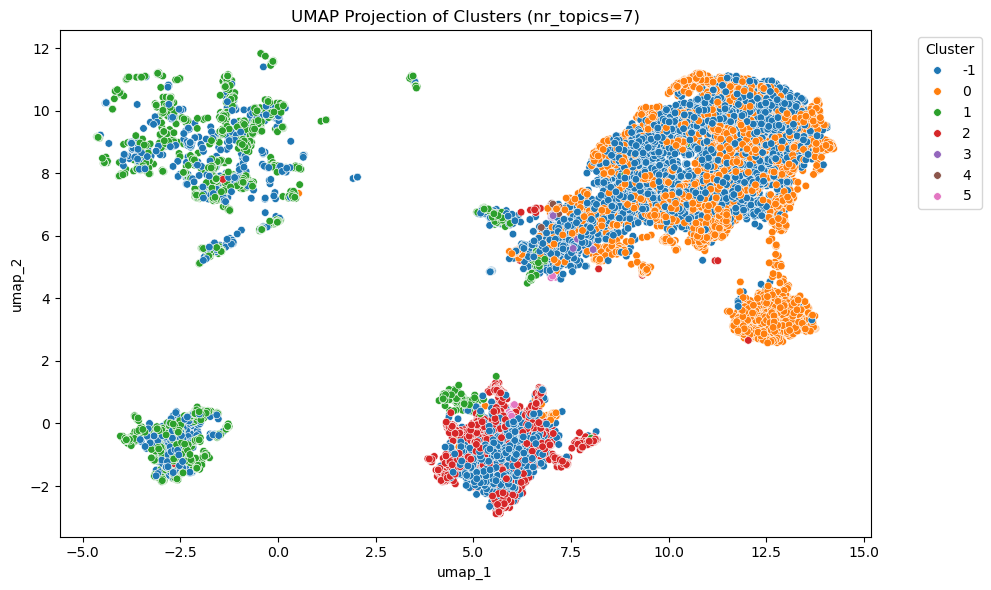

In [14]:
topic_model_reduced_7  = analyze_reduced_topics(topic_model, docs, nr_clusters=7)

In [15]:
df_clean.columns

Index(['name', 'asins', 'brand', 'categories', 'primaryCategories',
       'imageURLs', 'doRecommend', 'rating', 'sourceURLs', 'label',
       'clean_text', 'name_cleaned', 'umap_kmeans_cluster', 'cluster_labels',
       'cluster_confidence', 'topic', 'topic_prob', 'cluster_id', 'tag',
       'is_best_deal', 'is_family_friendly', 'is_durability_issue',
       'is_top_product', 'is_battery_praise', 'is_battery_complaint',
       'is_performance_met', 'final_tag'],
      dtype='object')

#### Assign Cluster Labels ("Tags") to Each Review

In [16]:
# Step 1: Map topic model output (cluster ID) to a new column
df_clean["cluster_id"] = topic_model_reduced_7.topics_  # Numeric topic from BERTopic

# Step 2: Define the human-readable labels ("tags") for each cluster
tag_map_7 = {
    -1: "Misc",         # Outliers or reviews that don't fit any topic
     0: "Family",       # Reviews about kids, Alexa, tablets, usability at home
     1: "Ratings",      # High satisfaction reviews with 4★/5★
     2: "Battery",      # Comments about battery life or energy use
     3: "Deals",        # Shopping/value-focused language
     4: "Durability",   # Complaints or mentions of product lifespan
     5: "Performance"   # Comments about performance, speed, expectations
}

# Step 3: Add the interpretable label as a new column called "tag"
df_clean["tag"] = df_clean["cluster_id"].map(tag_map_7)


#### Compare_topic_vs_sentiment 

In [17]:
# For reduced model
count, prop = compare_topic_vs_sentiment(df_clean, topic_col='tag', label_col='label')

# Display
display(count)
display(prop)

label,0,1,2
tag,,,
Battery,299,110,1734
Deals,2,4,71
Durability,1,0,38
Family,185,273,6394
Misc,525,351,6899
Performance,16,4,6
Ratings,196,133,2819


label,0,1,2
tag,,,
Battery,0.14,0.05,0.81
Deals,0.03,0.05,0.92
Durability,0.03,0.00,0.97
Family,0.03,0.04,0.93
Misc,0.07,0.05,0.89
Performance,0.62,0.15,0.23
Ratings,0.06,0.04,0.90


In [18]:
df_clean[["label","clean_text", "cluster_id", "tag"]].sample(5)


,label,clean_text,cluster_id,tag
7091,2,five star product work describ great valu,-1,Misc
5300,2,definit winner price fantast work well certain...,-1,Misc
13390,2,pretti good batteri great cheap batteri pay,2,Battery
5162,2,buy cheaper good price sale buy amount manard ...,-1,Misc
13068,2,great batteri keep read peopl theoriz energi u...,-1,Misc


#### Cooked Tag Logic Using Both Topic + Sentiment

In [19]:
# Positive reviews in the "Deals" cluster → suggests strong perceived value
df_clean['is_best_deal'] = (df_clean['tag'] == 'Deals') & (df_clean['label'] == 2)

# Positive reviews in the "Family" cluster → good experience for kids/home use
df_clean['is_family_friendly'] = (df_clean['tag'] == 'Family') & (df_clean['label'] == 2)

# Negative or neutral reviews in the "Durability" cluster → likely complaints about lifespan
df_clean['is_durability_issue'] = (df_clean['tag'] == 'Durability') & (df_clean['label'] <= 1)

# Positive reviews in the "Ratings" cluster → indicates highly satisfied (5-star) customers
df_clean['is_top_product'] = (df_clean['tag'] == 'Ratings') & (df_clean['label'] == 2)

# Positive reviews in the "Battery" cluster → praise about performance/duration
df_clean['is_battery_praise'] = (df_clean['tag'] == 'Battery') & (df_clean['label'] == 2)

# Neutral or negative reviews in the "Battery" cluster → complaints or issues
df_clean['is_battery_complaint'] = (df_clean['tag'] == 'Battery') & (df_clean['label'] <= 1)

# Positive reviews in the "Performance" cluster → expectations were met
df_clean['is_performance_met'] = (df_clean['tag'] == 'Performance') & (df_clean['label'] == 2)



#### Combine into One Column: final_tag

In [20]:
def assign_final_tag(row):
    if row['is_family_friendly']:
        return 'Family'
    elif row['is_top_product']:
        return 'TopProduct'
    elif row['is_best_deal']:
        return 'BestDeal'
    elif row['is_performance_met']:
        return 'PerformanceMet'
    elif row['is_battery_praise']:
        return 'BatteryPraise'
    elif row['is_battery_complaint']:
        return 'BatteryComplaint'
    elif row['is_durability_issue']:
        return 'DurabilityIssue'
    else:
        return 'Generic'  # fallback if no special logic applies

# Apply to dataframe
df_clean['final_tag'] = df_clean.apply(assign_final_tag, axis=1)

#### Final table samples

In [21]:
df_clean[["name_cleaned","cluster_labels","label","clean_text", "cluster_id", "tag","final_tag"]].sample(10)

,name_cleaned,cluster_labels,label,clean_text,cluster_id,tag,final_tag
5485,amazonbasics aaa performance alkaline batterie...,AAA Batteries,2,excel batteri put handheld scanner week ago st...,2,Battery,BatteryPraise
4913,amazonbasics aaa performance alkaline batterie...,AAA Batteries,2,batteri high qualiti surprisingli power use ba...,-1,Misc,Generic
915,amazon echo plus w builtin hub silver,Echo / Alexa Smart Device,2,best smart item perfect start smart homework p...,0,Family,Family
1637,fire kids edition tablet display wifi gb blu...,Fire Tablet,2,yet use product use product item gift yet rece...,-1,Misc,Generic
4469,amazonbasics aaa performance alkaline batterie...,AAA Batteries,2,clear thumb use buy batteri costco come kirkla...,-1,Misc,Generic
11396,amazonbasics aaa performance alkaline batterie...,AAA Batteries,1,three star good batteri,1,Ratings,Generic
7974,amazonbasics aaa performance alkaline batterie...,AAA Batteries,2,four star perfect altern super market batteri,1,Ratings,TopProduct
17747,fire tablet display wifi gb includes specia...,Fire Tablet,2,happi purchas bought primarili video son car m...,-1,Misc,Generic
17192,fire kids edition tablet display wifi gb pin...,Fire Tablet,2,tablet fever got tablet year old grand daughte...,-1,Misc,Generic
256,amazon echo show alexaenabled bluetooth speake...,Echo / Alexa Smart Device,2,great devic smart home enthusiast facilit easi...,0,Family,Family


In [22]:
df_clean.columns

Index(['name', 'asins', 'brand', 'categories', 'primaryCategories',
       'imageURLs', 'doRecommend', 'rating', 'sourceURLs', 'label',
       'clean_text', 'name_cleaned', 'umap_kmeans_cluster', 'cluster_labels',
       'cluster_confidence', 'topic', 'topic_prob', 'cluster_id', 'tag',
       'is_best_deal', 'is_family_friendly', 'is_durability_issue',
       'is_top_product', 'is_battery_praise', 'is_battery_complaint',
       'is_performance_met', 'final_tag'],
      dtype='object')

#### Export for use

In [25]:
df_clean.to_csv("data/cleaned_amazon_reviews_final.csv", index=False)
#df_clean.to_csv("data/reviews_tagged_with_topics_and_sentiment.csv", index=False)

### Save the Reduced BERTopic Model

In [26]:
# Save trained model
joblib.dump(topic_model_reduced_7, "models/bertopic_reduced_7_model.joblib")
print("✅ Model saved to models/bertopic_reduced_7_model.joblib")

✅ Model saved to models/bertopic_reduced_7_model.joblib
